# Импортируем необходимые модули

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
import scipy.stats as sts
%matplotlib inline

## Экспоненциальное распределение
Мною выбрано экспоненциальное распределение, просто пальцем в небо (точнее, в Википедию) :)
Задаём массив exp_distribution_array, генерируем выборку из 1000 чисел экспоненциального распределения.

Определение экспоненциального распределения:
Случайная величина <math>X</math> имеет экспоненциальное распределение с параметром <math>lambda > 0</math>, если её плотность вероятности имеет вид
: <math>f_X(x) = \begin{cases}
\lambda \,e^{-\lambda x} ,& x \ge 0, \\
0 ,& x < 0.
\end{cases}</math>.
Детальнее тут (Вики): https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
    
## Рисуем гистограмму экспоненциального распределения
Используем, логично, библиотеку matplotlib
density - вместо normed потому что иначе получаю предупреждение о том, что параметр переименован.

Получаем гистограмму и вероятностную плотность распределения, как мы видим, значения достаточно близки к действительности

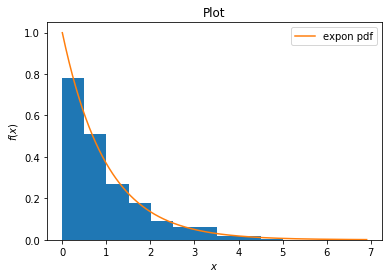

In [57]:
exp_arr = expon.rvs(size=1000)
x = np.linspace(expon.ppf(0.001), expon.ppf(0.999), 1000)
plt.hist(exp_arr, density=True, histtype='stepfilled')
plt.plot(x, expon.pdf(x), label='expon pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')
_ = plt.title(u'Plot')

## Оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок

Возьмем n = 5, 30, 100

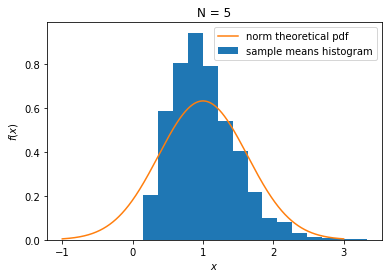

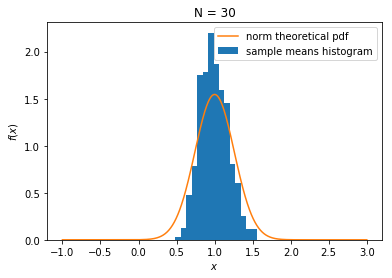

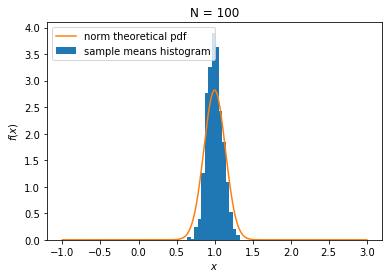

In [73]:
mean, variance = expon.stats() # получаем среднее и дисперсию стандартными функциями библиотеки scipy.stats
for n in [5, 30, 100]:
    # вычисляется среднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(expon.rvs(size = n).mean())
    plt.hist(sample_means, density=True, bins=15, label='sample means histogram') # строим соответствующую гистограмму для n=5, n=30, n=100
    # вычисляется pdf нормального распределения с данными параметрами
    norm_rv = sts.norm(variance, np.sqrt(2.*variance/n))
    x = np.linspace(-1, 3, 1000) # область определения для функции нормального распределения
    pdf = norm_rv.pdf(x)
    
    # строим график нормального распределения
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("N = %d" % n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

# Выводы по работе

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Чем больше значение n, тем более точной становится аппроксимация.
По закону больших чисел нормальное распределение начинает относительно совпадать с гистограммой.